# This purpose of this notebook purpose is to analyse Spotify data as made available from Kaggle
https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

Starts by looking at top 50 of 2019, but moves to looking at more data from 2010 - 2019.

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [164]:
%matplotlib inline


In [214]:
df_1 = pd.read_csv("top10s.csv",encoding = "ISO-8859-1")

df_1.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [217]:
# Renaming variables as with smaller sample
df_1.rename(columns={"title": "Track",
                    "artist": "Artist",
                     "top genre": "Genre",
                      "bpm": "BpM",
                    "nrgy": "Energy",
                  "dB": "Loudness",
                  "val": "Valence",
                     "dnce": "Danceability",
                  "dur": "Length",
                  "acous":"Acousticness",
                     "live": "Liveness",
                  "spch": "Speechiness",
                    "pop" : "Popularity"},inplace=True)

df_1.head()

,Track,Artist,Genre,year,BpM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [215]:
df_1.drop( columns=['Unnamed: 0'],inplace=True)
df_1.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [218]:
df_1["Artist"].value_counts().head(10)

Katy Perry          17
Justin Bieber       16
Maroon 5            15
Rihanna             15
Lady Gaga           14
Bruno Mars          13
The Chainsmokers    11
Pitbull             11
Ed Sheeran          11
Shawn Mendes        11
Name: Artist, dtype: int64

In [219]:
df_1["Genre"].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
Name: Genre, dtype: int64

Trying to break down number of genres to more generic names

In [220]:
def genre(x):
    if "pop" in x.lower():
        return "Pop"
    elif "hip hop" in x.lower():
        return "Hip Hop"
    elif "reggae" in x.lower():
        return "Reggae"
    elif "rap" in x.lower():
        return "Rap"
    elif "room" in x.lower() or "dance" in x.lower():
        return "Dance"
    elif "latin" in x.lower():
        return "Latin"
    elif "house" in x.lower():
        return "House"
    else:
        return x
    

In [221]:
df_1["Genre_1"] = df_1["Genre"].apply(lambda x: genre(x))

df_1["Genre_1"].value_counts()

Pop                          485
Dance                         18
boy band                      15
Hip Hop                       14
british soul                  11
canadian contemporary r&b      9
neo mellow                     9
complextro                     6
edm                            5
House                          5
Latin                          5
permanent wave                 4
Rap                            3
belgian edm                    2
brostep                        2
downtempo                      2
electro                        2
alternative r&b                1
hollywood                      1
irish singer-songwriter        1
alaska indie                   1
celtic rock                    1
contemporary country           1
Name: Genre_1, dtype: int64

In [222]:
df_1.groupby("Genre_1").describe()["Popularity"].sort_values(by='mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Genre_1,,,,,,,,
brostep,2.0,86.000000,5.656854,82.0,84.00,86.0,88.00,90.0
alternative r&b,1.0,84.000000,NaN,84.0,84.00,84.0,84.00,84.0
irish singer-songwriter,1.0,81.000000,NaN,81.0,81.00,81.0,81.00,81.0
celtic rock,1.0,80.000000,NaN,80.0,80.00,80.0,80.00,80.0
edm,5.0,78.200000,7.328028,71.0,71.00,79.0,82.00,88.0
canadian contemporary r&b,9.0,77.666667,6.892024,68.0,71.00,79.0,84.00,85.0
Rap,3.0,77.333333,4.509250,73.0,75.00,77.0,79.50,82.0
contemporary country,1.0,76.000000,NaN,76.0,76.00,76.0,76.00,76.0
electro,2.0,74.500000,3.535534,72.0,73.25,74.5,75.75,77.0


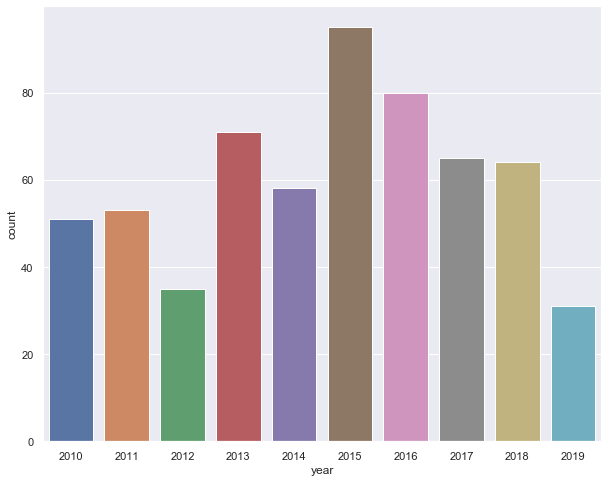

In [223]:
sns.countplot(x="year",data=df_1)

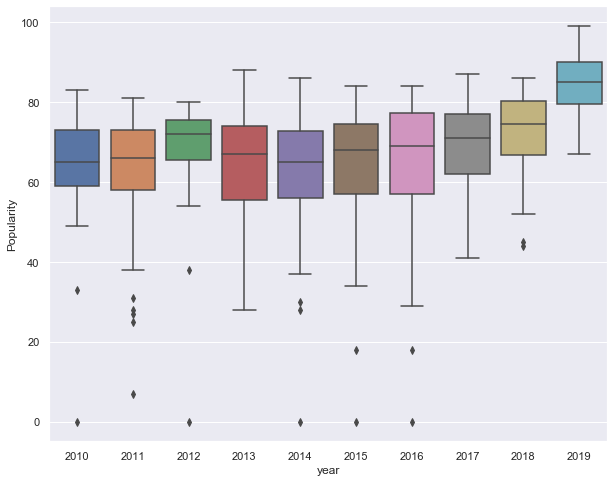

In [224]:
sns.boxplot(x="year",y="Popularity",data = df_1)

Spotify as a company launched a large marketing campaign end of 2016, potentially leading to the general improved popularity in subsequent years.

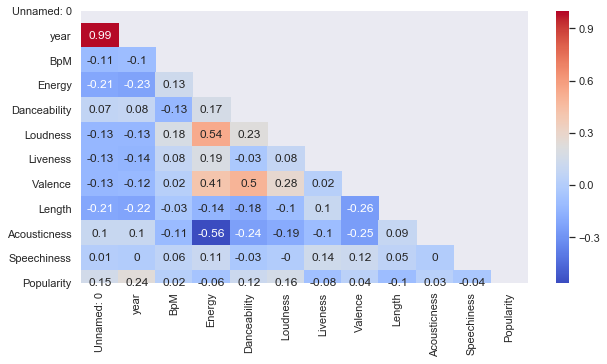

In [176]:
mask = np.zeros_like(df_1.corr())
mask[np.triu_indices_from(df_1.corr())] = True
sns.set(rc={'figure.figsize':(10, 5)})

figure = sns.heatmap(data=df_1.corr().round(2),mask = mask, cmap = "coolwarm",annot=True)



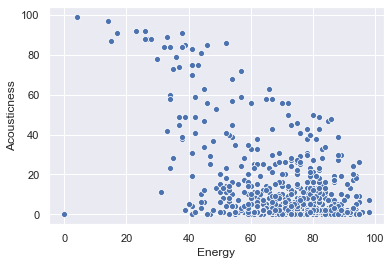

In [154]:
scatter= sns.scatterplot(x="Energy",y="Acousticness",data=df_1)


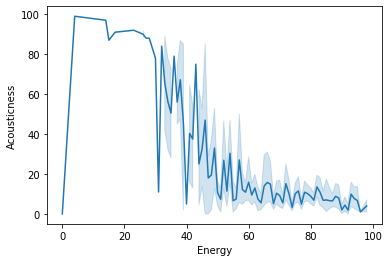

In [115]:
sns.lineplot(x="Energy",y="Acousticness",data=df_1)

In [156]:
df_1[df_1["Energy"]==0]

,Unnamed: 0,Track,Artist,Genre,year,BpM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Genre_1
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,british soul


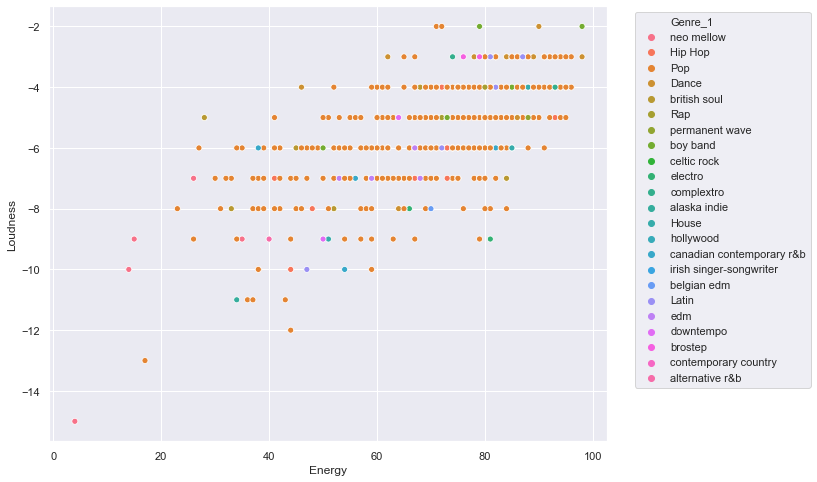

In [205]:
sns.set(rc={'figure.figsize':(10, 8)})

# Removing outlier as part of this plot
scatter= sns.scatterplot(x="Energy",y="Loudness",data=df_1[df_1["Loudness"]>-60],hue="Genre_1")
scatter.legend(bbox_to_anchor=(1.04,1))

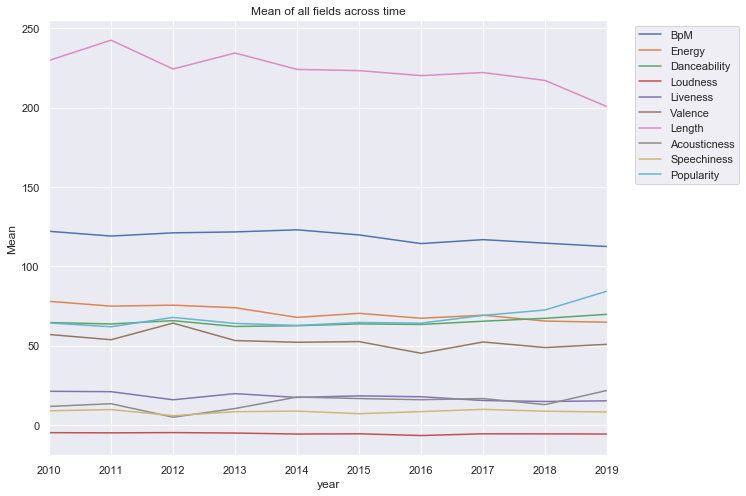

In [227]:
grouped = df_1.groupby(by="year").mean()


grouped.plot()
plt.title("Mean of all fields across time")
plt.ylabel("Mean")
plt.legend(bbox_to_anchor=(1.04,1))

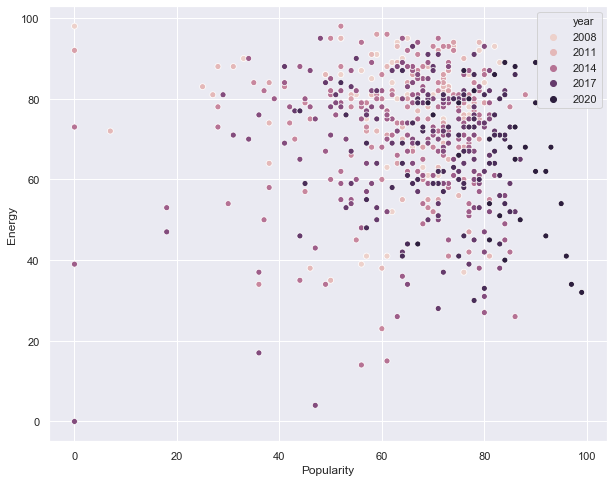

In [198]:
sns.scatterplot(x="Popularity",y="Energy",data=df_1,hue ="year")